<a href="https://colab.research.google.com/github/jabanitaha/data-mining-2-/blob/main/M04L01_Lab_Building_Autoencoders_v1_Answered_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Building Autoencoders**


Estimated time needed: **30** minutes


In this lab, you will learn how to build autoencoders using Keras.  


## Learning Objectives

By the end of this lab, you will:

- Load and preprocess the MNIST dataset for training an autoencoder.

- Construct a simple autoencoder model using the Keras functional API.

- Train the autoencoder on the MNIST dataset.

- Evaluate the performance of the trained autoencoder.

- Fine-tune the autoencoder to improve its performance.

- Use the autoencoder to denoise images.


----


### Step-by-Step Instructions:

#### Step 1: Data Preprocessing

This exercise prepares the MNIST dataset for training by normalizing the pixel values and flattening the images. Normalization helps in faster convergence during training, and flattening is required because the input layer of our autoencoder expects a one-dimensional vector.


In [1]:
!pip install tensorflow==2.16.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.7/590.7 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 73.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.6 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: ml-dtypes
    F

In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist

# Load the dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In the above code:
- Use Keras to load the MNIST dataset.
- Normalize the image pixel values to the range [0, 1].
- Flatten the 28x28 images to a 784-dimensional vector to reshape the data.


#### Step 2: Building the Autoencoder Model

This exercise involves building an autoencoder with an encoder that compresses the input to 32 dimensions and a decoder that reconstructs the input from these 32 dimensions. The model is compiled with the Adam optimizer and binary crossentropy loss.


In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_layer, output_layer)

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Summary of the model
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In the above code:

**1. Define the Encoder:**
- Create an input layer with 784 neurons.
- Add a Dense layer with 64 neurons and ReLU activation.

**2. Define the Bottleneck:**
- Add a Dense layer with 32 neurons and ReLU activation.

**3. Define the Decoder:**
- Add a Dense layer with 64 neurons and ReLU activation.
- Add an output layer with 784 neurons and sigmoid activation.

**4. Compile the Model:**
- Use the Adam optimizer and binary crossentropy loss.  


#### Step 3: Training the Autoencoder

In this exercise, the autoencoder is trained to reconstruct the MNIST images. The training data is both the input and the target, as the autoencoder learns to map the input to itself.


In [3]:
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3689 - val_loss: 0.1776
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1696 - val_loss: 0.1433
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1403 - val_loss: 0.1279
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.1275 - val_loss: 0.1201
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1201 - val_loss: 0.1140
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1138 - val_loss: 0.1091
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1098 - val_loss: 0.1061
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1068 - val_loss: 0.1037
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1045 - val_loss: 0.1019
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1028 - val_loss: 0.1007
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1019 - val_loss: 0.0996
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s

In the above code:
- Use the `fit` method to train the model on the training data.
- Set the number of epochs to 25 and the batch size to 256..
- Use the test data for validation.


#### Step 4: Evaluating the Autoencoder

This exercise evaluates the autoencoder by reconstructing the test images and comparing them to the original images. Visualization helps in understanding how well the autoencoder has learned to reconstruct the input data.


In [1]:
!pip install matplotlib==3.9.2

In [6]:
from tensorflow.keras.datasets import mnist
import numpy as np

# Load and preprocess the data
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize and flatten
x_train = x_train.astype("float32") / 255.
x_test = x_test.astype("float32") / 255.

x_train = x_train.reshape((len(x_train), 28 * 28))
x_test = x_test.reshape((len(x_test), 28 * 28))


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.3596 - val_loss: 0.1688
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.1618 - val_loss: 0.1416
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1390 - val_loss: 0.1278
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1258 - val_loss: 0.1190
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1190 - val_loss: 0.1133
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


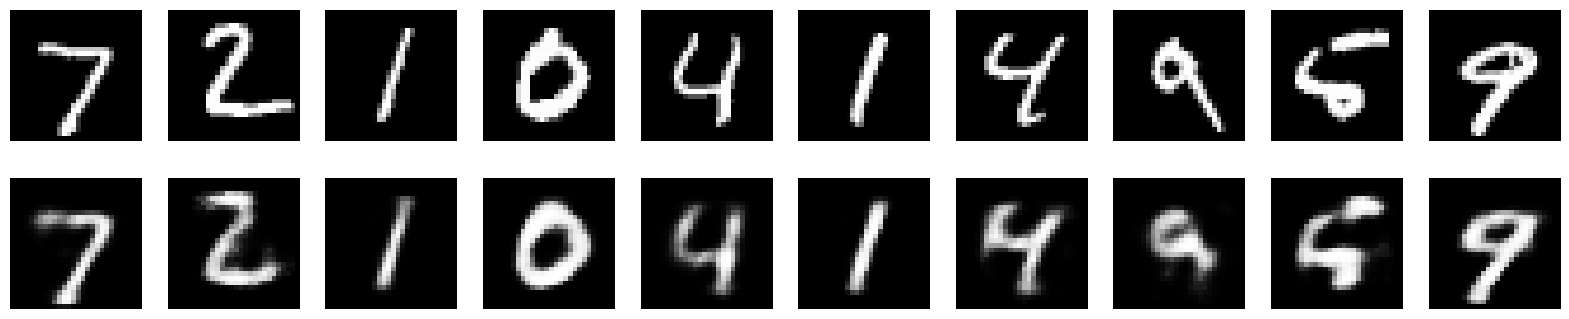

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
import matplotlib.pyplot as plt

# Build Autoencoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train Autoencoder
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Predict the test data
reconstructed = autoencoder.predict(x_test)

# Visualize original vs reconstructed
n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis("off")

    # Reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
    plt.axis("off")
plt.show()



In the above code:

**1. Reconstruct Images:**
- Use the autoencoder to predict the test data.
- Compare the original test images with the reconstructed images.

**2. Visualize the Results:**
- Plot a few examples of original and reconstructed images side by side.


#### Step 5: Fine-Tuning the Autoencoder

Fine-tuning the autoencoder by unfreezing some layers can help in improving its performance. In this exercise, you unfreeze the last four layers and train the model again for a few more epochs.


In [8]:
# Freeze all layers of the autoencoder
for layer in autoencoder.layers:
    layer.trainable = False


In [9]:
# Check trainable status of each layer
for i, layer in enumerate(autoencoder.layers):
    print(f"Layer {i}: {layer.name}, Trainable = {layer.trainable}")


Layer 0: input_layer_2, Trainable = False
Layer 1: dense_8, Trainable = False
Layer 2: dense_9, Trainable = False
Layer 3: dense_10, Trainable = False
Layer 4: dense_11, Trainable = False


In [10]:
# Unfreeze the top layers of the encoder
for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# Compile the model again
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model again
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.1151 - val_loss: 0.1102
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1108 - val_loss: 0.1073
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1083 - val_loss: 0.1050
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1051 - val_loss: 0.1024
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1037 - val_loss: 0.1008
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1018 - val_loss: 0.0996
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1006 - val_loss: 0.0986
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0997 - val_loss: 0.0977
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0987 - val_loss: 0.0968
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0980 - val_loss: 0.0962


In the above code:

**1. Freeze all the Encoder Layers:**
- Freeze all the layers of the encoder.

**2. Check the Status:**
- Checking the trainable status of each layer.

**3. Unfreeze the Encoder Layers:**
- Unfreeze the last four layers of the encoder.

**4. Compile and Train the Model:**
- Recompile the model.
- Train the model again for 10 epochs with the same training and validation data.


#### Step 6: Denoising Images with Autoencoder

In this exercise, you add random noise to the dataset and train the autoencoder to denoise the images. The autoencoder learns to reconstruct the original images from the noisy input, which can be visualized by comparing the noisy, denoised, and original images.


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1884 - val_loss: 0.1364
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1354 - val_loss: 0.1303
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1307 - val_loss: 0.1280
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1288 - val_loss: 0.1267
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1272 - val_loss: 0.1256
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1265 - val_loss: 0.1252
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1259 - val_loss: 0.1245
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 0.1252 - val_loss: 0.1245
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.1247 - val_loss: 0.1242
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1247 - val_loss: 0.1244
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.1246 - val_loss: 0.1234
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

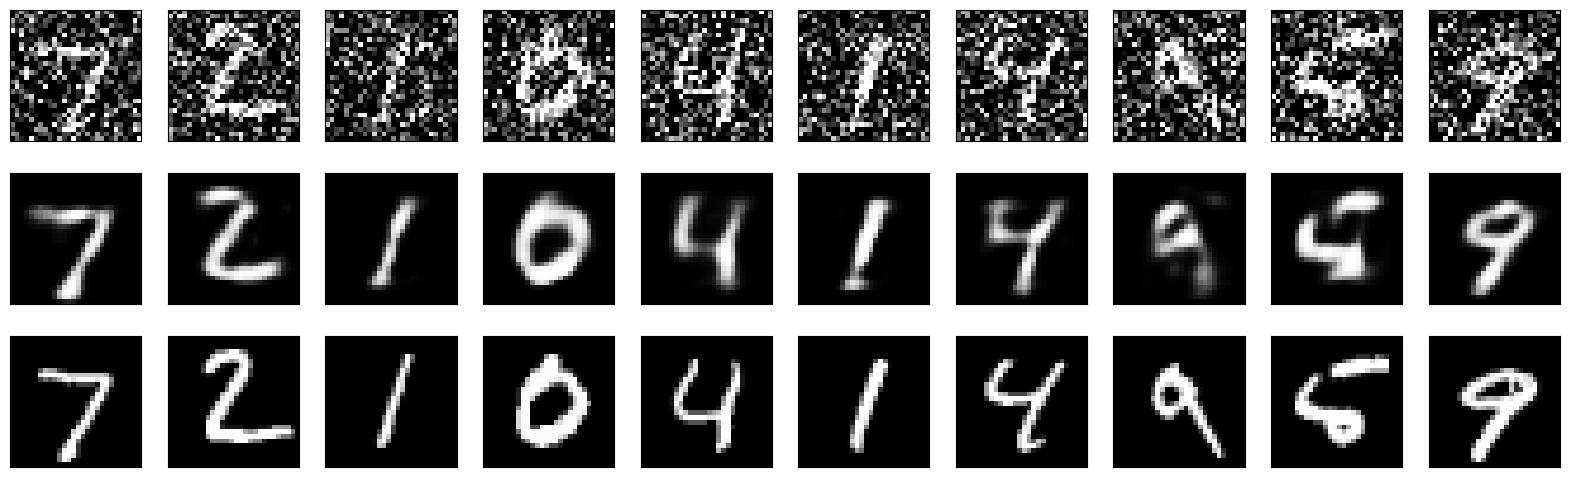

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Add noise to the data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder with noisy data
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images
reconstructed_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10  # Number of digits to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display denoised images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(reconstructed_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In the above code:

**1. Add noise to the data:**
- Add random noise to the training and test data.
- Train the Autoencoder with noisy data:
-Train the autoencoder using the noisy images as input and the original images as target.

**2. Evaluate the denoising performance:**
- Use the autoencoder to denoise the test images.
- Compare the noisy, denoised, and original images.


## Practice Exercises:

### Exercise 1: Exploring Different Bottleneck Sizes

#### Objective:

To understand the impact of different bottleneck sizes on the performance of the autoencoder.

#### Instructions:

**1. Define new models with different bottleneck sizes:**
- Create three new autoencoder models, each with a different bottleneck size (e.g., 16, 32, and 64 neurons).
- Use the same encoder and decoder architecture as in the main lab but change the number of neurons in the bottleneck layer.

**2. Train the models:**
- Train each model on the MNIST dataset for 50 epochs with a batch size of 256.
- Use the same preprocessing steps as in the main lab.

**3. Evaluate and Compare the Models:**
- Evaluate the performance of each model on the test data.
- Compare the reconstruction loss of the models to understand how the bottleneck size affects the autoencoder's ability to reconstruct the input data.


In [12]:
# Write your code here
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Define a new bottleneck size
bottleneck_size = 16  # You can also try 2, 8, 64, etc.

# Encoder
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)
bottleneck = Dense(bottleneck_size, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │         1,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,328 (403.62 KB)

 Trainable params: 103,328 (403.62 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3677 - val_loss: 0.1830
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1750 - val_loss: 0.1541
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1512 - val_loss: 0.1418
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1413 - val_loss: 0.1336
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1331 - val_loss: 0.1278
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1284 - val_loss: 0.1249
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1256 - val_loss: 0.1229
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1240 - val_loss: 0.1213
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1225 - val_loss: 0.1205
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1215 - val_loss: 0.1195
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.1205 - val_loss: 0.1187
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 1

<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


In [13]:
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.3590 - val_loss: 0.1799
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1736 - val_loss: 0.1528
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1499 - val_loss: 0.1404
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1407 - val_loss: 0.1357
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1366 - val_loss: 0.1331
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1342 - val_loss: 0.1314
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1325 - val_loss: 0.1301
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1312 - val_loss: 0.1287
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1300 - val_loss: 0.1275
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.1289 - val_loss: 0.1261
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1270 - val_loss: 0.1244
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 

<details>
    <summary>Click here for Solution</summary>

```python
# Define and train three different autoencoders with varying bottleneck sizes
bottleneck_sizes = [16, 32, 64]
autoencoders = []

for size in bottleneck_sizes:
    # Encoder
    input_layer = Input(shape=(784,))
    encoded = Dense(64, activation='relu')(input_layer)
    bottleneck = Dense(size, activation='relu')(encoded)

    # Decoder
    decoded = Dense(64, activation='relu')(bottleneck)
    output_layer = Dense(784, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(input_layer, output_layer)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    autoencoder.fit(
        x_train,
        x_train,
        epochs=20,
        batch_size=256,
        shuffle=True,
        validation_data=(x_test, x_test)
    )
    autoencoders.append(autoencoder)

# Evaluate and compare the models
for i, size in enumerate(bottleneck_sizes):
    loss = autoencoders[i].evaluate(x_test, x_test)
    print(f'Bottleneck size {size} - Test loss: {loss}')
```

</details>


### Exercise 2 - Adding Regularization to the Autoencoder

#### Objective:

To explore the effect of regularization on the performance of the autoencoder.

#### Instructions:

**1. Modify the model:**
- Add L2 regularization to the Dense layers in both the encoder and decoder parts of the autoencoder.

**2. Train the model:**
- Train the modified autoencoder on the MNIST dataset for 50 epochs with a batch size of 256.

**3. Evaluate and compare:**
- Evaluate the performance of the regularized autoencoder and compare it with the non-regularized version.


In [14]:
# Write your code here
from tensorflow.keras import regularizers

# Encoder with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu',
                activity_regularizer=regularizers.l2(1e-5))(input_layer)
bottleneck = Dense(32, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(bottleneck)
output_layer = Dense(784, activation='sigmoid')(decoded)

# Autoencoder with regularization
autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.4104 - val_loss: 0.2140
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.2031 - val_loss: 0.1780
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1749 - val_loss: 0.1650
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1641 - val_loss: 0.1543
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1538 - val_loss: 0.1472
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1469 - val_loss: 0.1420
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1417 - val_loss: 0.1377
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1383 - val_loss: 0.1348
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1350 - val_loss: 0.1313
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1321 - val_loss: 0.1285
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1294 - val_loss: 0.1256
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 2

<details>
    <summary>Click here for Solution</summary>

```python

from tensorflow.keras.regularizers import l2

# Encoder with L2 regularization
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(input_layer)
bottleneck = Dense(32, activation='relu', kernel_regularizer=l2(0.01))(encoded)

# Decoder with L2 regularization
decoded = Dense(64, activation='relu', kernel_regularizer=l2(0.01))(bottleneck)
output_layer = Dense(784, activation='sigmoid', kernel_regularizer=l2(0.01))(decoded)

# Autoencoder model with L2 regularization
autoencoder_regularized = Model(input_layer, output_layer)
autoencoder_regularized.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
autoencoder_regularized.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Evaluate the model
loss = autoencoder_regularized.evaluate(x_test, x_test)
print(f'Regularized Autoencoder - Test loss: {loss}')
```

</details>


### Exercise 3 - Visualizing Intermediate Representations

#### Objective:

To visualize and understand the intermediate representations (encoded features) learned by the autoencoder.

#### Instructions:

**1. Extract Encoder Part:**
- Extract the encoder part of the trained autoencoder to create a separate model that outputs the encoded features.

**2. Visualize Encoded Features:**
- Use the encoder model to transform the test data into the encoded space.
- Plot the encoded features using a scatter plot for the first two dimensions of the encoded space.


In [15]:
# Writw your code here
# Extract encoder model
encoder = Model(input_layer, bottleneck)

# Encode test data
encoded_imgs = encoder.predict(x_test)

# Visualize (if bottleneck has 2 dimensions)
import matplotlib.pyplot as plt

if encoded_imgs.shape[1] == 2:
    plt.figure(figsize=(6, 6))
    plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], s=1)
    plt.title("2D Bottleneck Representations")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()
else:
    print(f"Bottleneck is {encoded_imgs.shape[1]}D — visualization skipped.")


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Bottleneck is 32D — visualization skipped.


<details>
    <summary>Click here for Solution</summary>

```python

import matplotlib.pyplot as plt

# Extract the encoder part of the autoencoder
encoder_model = Model(input_layer, bottleneck)

# Encode the test data
encoded_imgs = encoder_model.predict(x_test)

# Visualize the first two dimensions of the encoded features
plt.figure(figsize=(10, 8))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
plt.title('Encoded Features - First Two Dimensions')
plt.xlabel('Encoded Feature 1')
plt.ylabel('Encoded Feature 2')
plt.show()
```

</details>


#### Conclusion:

Congratulations on completing this lab! In this lab, you have gained practical experience in building, training, and evaluating autoencoders using Keras. You have learned to preprocess data, construct a basic autoencoder architecture, train the model on the MNIST dataset, and visualize the results. Additionally, you explored fine-tuning techniques to enhance the model's performance and applied the autoencoder to denoise images.

Continue experimenting with different architectures, datasets, and applications to further deepen your knowledge and skills in using autoencoders. The concepts and techniques you have learned in this lab will serve as a foundation for more advanced topics in deep learning.


## Authors


Skills Network


Copyright © IBM Corporation. All rights reserved.
